<h1> Train v Test Distributions Comparisons </h1>

In [83]:
#imports
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import geopandas as gpd
#from vayuhvalidate import formatdf
import vayuhvalidate as vv
#from vayuhvalidate import *
#import vayuhmetrics as vm

In [84]:
import vayuhvalidate as vv
test = pd.read_csv('../results files/results_test.csv', encoding='utf-8')
test = vv.formatdf(test)
test

AttributeError: module 'vayuhvalidate' has no attribute 'formatdf'

In [29]:
#load the training set
train = pd.read_csv('../results files/results_train.csv', encoding='utf-8')
train = train.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
train['err'] = train['xgboost_tmp2m_pred'] - train['tmp2m']
train['lon2'] = train['lon']-360
train['latlon'] = train['lat'].astype(str) + "|" + train['lon'].astype(str)
train['start_date'] = pd.to_datetime(train['start_date'])
train['month'] = pd.DatetimeIndex(train['start_date']).month
train['month2'] = train['month'].astype(str).str.zfill(2)
train['year'] = pd.DatetimeIndex(train['start_date']).year
train['yearmonth'] = train['year'].astype(str) + '-' + train['month2'].astype(str)
train['date'] = pd.DatetimeIndex(train['start_date']).day
train['date2'] = train['date'].astype(str).str.zfill(2)
train['err'] = round(train['err'],3)
train['phys_err'] = round(train['phys_err'],3)

#Seasons
def season (x):
    if x in [12,1,2]:
        return 'winter'
    elif x in [3,4,5]:
        return 'spring'
    elif x in [6,7,8]:
        return 'summer'
    elif x in [9,10,11]:
        return 'fall'

#Locations
locations = pd.read_csv("../dictionaries/locations.csv", encoding="utf-8")
locations.rename(columns={"Location": "latlon"}, inplace=True)
locations.sort_values(by=['latlon'], ascending=False)


#Map season and location and extremes
train['season'] = train['month'].apply(season)
train = pd.merge(train, locations, on='latlon')
train['heatwave'] = train['tmp2m'] >34
train['coldwave'] = train['tmp2m'] <-10

#Functions / Metrics
def mbe (x):
    return round(np.mean(x),3)

def mae (x):
    return round(np.mean(abs(x)), 3)

def sd (x):
    return round(np.std(x), 3)

train = train[train['start_date']<'2019-01-01']
train['mdll'] = train['month2'] + "|" + train['date2'] + "|" + train['latlon']
train['split'] = 'train'
train

,key,start_date,lat,lon,xgboost_tmp2m_pred_zscore,tmp2m_daily_mean,tmp2m_daily_std,tmp2m_zscore,tmp2m,xgboost_tmp2m_pred,...,date,date2,season,State,Sub-Region,Region,heatwave,coldwave,mdll,split
883,2018-12-29|27.25|261.75,2018-12-29,27.25,261.75,-0.057595,14.702227,2.866412,-0.252842,13.977478,14.537137,...,29,29,winter,Texas,West South Central,South,False,False,12|29|27.25|261.75,train
884,2018-12-30|27.25|261.75,2018-12-30,27.25,261.75,-0.098113,14.775914,2.747496,-0.364047,13.775695,14.506349,...,30,30,winter,Texas,West South Central,South,False,False,12|30|27.25|261.75,train
885,2018-12-31|27.25|261.75,2018-12-31,27.25,261.75,-0.105415,14.939033,2.615850,-0.368487,13.975126,14.663282,...,31,31,winter,Texas,West South Central,South,False,False,12|31|27.25|261.75,train
886,2018-12-19|27.25|261.75,2018-12-19,27.25,261.75,0.223795,14.102848,2.503313,0.257848,14.748323,14.663078,...,19,19,winter,Texas,West South Central,South,False,False,12|19|27.25|261.75,train
887,2018-12-20|27.25|261.75,2018-12-20,27.25,261.75,0.258854,14.231063,2.352766,0.405074,15.184108,14.840086,...,20,20,winter,Texas,West South Central,South,False,False,12|20|27.25|261.75,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536623,2013-12-19|47.25|273.75,2013-12-19,47.25,273.75,-0.904409,-6.268636,3.717467,-0.955718,-9.821487,-9.630747,...,19,19,winter,Michigan,East North Central,Midwest,False,False,12|19|47.25|273.75,train
536624,2013-12-20|47.25|273.75,2013-12-20,47.25,273.75,-0.904409,-6.439524,3.732835,-0.719103,-9.123818,-9.815534,...,20,20,winter,Michigan,East North Central,Midwest,False,False,12|20|47.25|273.75,train
536625,2013-12-21|47.25|273.75,2013-12-21,47.25,273.75,-0.904409,-6.520265,3.668464,-0.743973,-9.249504,-9.838058,...,21,21,winter,Michigan,East North Central,Midwest,False,False,12|21|47.25|273.75,train
536626,2013-12-22|47.25|273.75,2013-12-22,47.25,273.75,-0.878938,-6.646918,3.681086,-0.836155,-9.724876,-9.882364,...,22,22,winter,Michigan,East North Central,Midwest,False,False,12|22|47.25|273.75,train


In [30]:
#load the test set
test = pd.read_csv('../results files/results_test.csv', encoding='utf-8')
test['err'] = test['xgboost_tmp2m_pred'] - test['tmp2m']
test['lon2'] = test['lon']-360
test['latlon'] = test['lat'].astype(str) + "|" + test['lon'].astype(str)
test['start_date'] = pd.to_datetime(test['start_date'])
test['month'] = pd.DatetimeIndex(test['start_date']).month
test['month2'] = test['month'].astype(str).str.zfill(2)
test['year'] = pd.DatetimeIndex(test['start_date']).year
test['yearmonth'] = test['year'].astype(str) + '-' + test['month2'].astype(str)
test['date'] = pd.DatetimeIndex(test['start_date']).day
test['date2'] = train['date'].astype(str).str.zfill(2)
test['err'] = round(test['err'],3)
test['phys_err'] = round(test['phys_err'],3)

#Seasons
def season (x):
    if x in [12,1,2]:
        return 'winter'
    elif x in [3,4,5]:
        return 'spring'
    elif x in [6,7,8]:
        return 'summer'
    elif x in [9,10,11]:
        return 'fall'

#Locations
locations = pd.read_csv("../dictionaries/locations.csv", encoding="utf-8")
locations.rename(columns={"Location": "latlon"}, inplace=True)
locations.sort_values(by=['latlon'], ascending=False)


#Map season and location and extremes
test['season'] = test['month'].apply(season)
test = pd.merge(test, locations, on='latlon')
test['heatwave'] = test['tmp2m'] >34
test['coldwave'] = test['tmp2m'] <-10

#Functions / Metrics
def mbe (x):
    return round(np.mean(x),3)

def mae (x):
    return round(np.mean(abs(x)), 3)

def sd (x):
    return round(np.std(x), 3)

test['mdll'] = test['month2'] + "|" + test['date2'] + "|" + test['latlon']
test['split'] = 'test'
test

,key,start_date,lat,lon,xgboost_tmp2m_pred_zscore,tmp2m_daily_mean,tmp2m_daily_std,tmp2m_zscore,tmp2m,xgboost_tmp2m_pred,...,date,date2,season,State,Sub-Region,Region,heatwave,coldwave,mdll,split
0,2019-10-01|27.25|261.75,2019-10-01,27.25,261.75,1.028229,22.870967,2.045002,-0.014837,22.840626,24.973697,...,1,NaN,fall,Texas,West South Central,South,False,False,NaN,test
1,2019-10-08|27.25|261.75,2019-10-08,27.25,261.75,1.093624,21.721882,1.985609,-1.286955,19.166492,23.893391,...,8,NaN,fall,Texas,West South Central,South,False,False,NaN,test
2,2019-10-15|27.25|261.75,2019-10-15,27.25,261.75,1.043933,20.675154,2.121438,-1.040800,18.467161,22.889792,...,15,NaN,fall,Texas,West South Central,South,False,False,NaN,test
3,2019-10-22|27.25|261.75,2019-10-22,27.25,261.75,0.892237,19.451975,2.304340,-1.896681,15.081376,21.507993,...,22,NaN,fall,Texas,West South Central,South,False,False,NaN,test
4,2019-10-29|27.25|261.75,2019-10-29,27.25,261.75,0.883454,18.518180,2.384524,-1.176233,15.713424,20.624798,...,29,NaN,fall,Texas,West South Central,South,False,False,NaN,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26393,2021-06-29|47.25|273.75,2021-06-29,47.25,273.75,-0.061508,15.384313,2.808936,0.734029,17.446154,15.211542,...,29,07,summer,Michigan,East North Central,Midwest,False,False,06|07|47.25|273.75,test
26394,2020-07-07|47.25|273.75,2020-07-07,47.25,273.75,-0.408582,16.091479,2.732136,-0.339037,15.165182,14.975177,...,7,26,summer,Michigan,East North Central,Midwest,False,False,07|26|47.25|273.75,test
26395,2020-07-14|47.25|273.75,2020-07-14,47.25,273.75,-0.268441,16.598514,2.503675,-0.350005,15.722215,15.926424,...,14,07,summer,Michigan,East North Central,Midwest,False,False,07|07|47.25|273.75,test
26396,2020-07-21|47.25|273.75,2020-07-21,47.25,273.75,-0.357121,16.739847,2.226671,0.118659,17.004061,15.944656,...,21,24,summer,Michigan,East North Central,Midwest,False,False,07|24|47.25|273.75,test


In [35]:
merged = pd.concat([train, test])
merged.set_index('key', inplace=True)
merged

,start_date,lat,lon,xgboost_tmp2m_pred_zscore,tmp2m_daily_mean,tmp2m_daily_std,tmp2m_zscore,tmp2m,xgboost_tmp2m_pred,err,...,date,date2,season,State,Sub-Region,Region,heatwave,coldwave,mdll,split
key,,,,,,,,,,,,,,,,,,,,,
2018-12-29|27.25|261.75,2018-12-29,27.25,261.75,-0.057595,14.702227,2.866412,-0.252842,13.977478,14.537137,0.560,...,29,29,winter,Texas,West South Central,South,False,False,12|29|27.25|261.75,train
2018-12-30|27.25|261.75,2018-12-30,27.25,261.75,-0.098113,14.775914,2.747496,-0.364047,13.775695,14.506349,0.731,...,30,30,winter,Texas,West South Central,South,False,False,12|30|27.25|261.75,train
2018-12-31|27.25|261.75,2018-12-31,27.25,261.75,-0.105415,14.939033,2.615850,-0.368487,13.975126,14.663282,0.688,...,31,31,winter,Texas,West South Central,South,False,False,12|31|27.25|261.75,train
2018-12-19|27.25|261.75,2018-12-19,27.25,261.75,0.223795,14.102848,2.503313,0.257848,14.748323,14.663078,-0.085,...,19,19,winter,Texas,West South Central,South,False,False,12|19|27.25|261.75,train
2018-12-20|27.25|261.75,2018-12-20,27.25,261.75,0.258854,14.231063,2.352766,0.405074,15.184108,14.840086,-0.344,...,20,20,winter,Texas,West South Central,South,False,False,12|20|27.25|261.75,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-29|47.25|273.75,2021-06-29,47.25,273.75,-0.061508,15.384313,2.808936,0.734029,17.446154,15.211542,-2.235,...,29,07,summer,Michigan,East North Central,Midwest,False,False,06|07|47.25|273.75,test
2020-07-07|47.25|273.75,2020-07-07,47.25,273.75,-0.408582,16.091479,2.732136,-0.339037,15.165182,14.975177,-0.190,...,7,26,summer,Michigan,East North Central,Midwest,False,False,07|26|47.25|273.75,test
2020-07-14|47.25|273.75,2020-07-14,47.25,273.75,-0.268441,16.598514,2.503675,-0.350005,15.722215,15.926424,0.204,...,14,07,summer,Michigan,East North Central,Midwest,False,False,07|07|47.25|273.75,test


/home/pranav/.local/lib/python3.8/site-packages/seaborn/distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


Train sd: 10.429
Test sd: 10.483


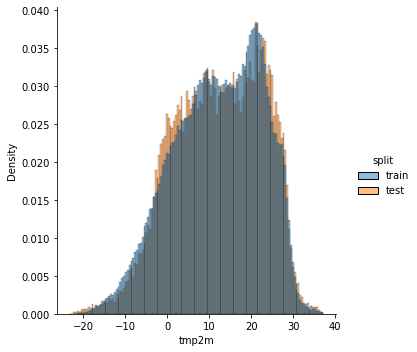

In [43]:
#OVERALL
sns.displot(ax=ax, data=merged, x='tmp2m', hue='split', stat='density', common_norm=False)
print('Train sd: ' + str(round(np.std(train['tmp2m']), 3)))
print('Test sd: ' + str(round(np.std(test['tmp2m']), 3)))

/home/pranav/.local/lib/python3.8/site-packages/seaborn/distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


Train sd: 10.666 | Test sd: 9.99


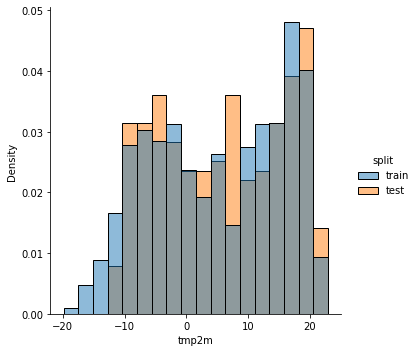

In [109]:
#BY STATE
#array(['Texas', 'Florida', 'Louisiana', 'Mississipi', 'Alabama',
#       'Georgia', 'California', 'Arizona', 'New Mexico', 'Arkansas',
#       'South Carolina', 'Oklahoma', 'Tennessee', 'North Carolina',
#       'Nevada', 'Utah', 'Colorado', 'Kansas', 'Missouri', 'Kentucky',
#       'Virginia', 'Illinois', 'Indiana', 'Ohio', 'West Virginia',
#       'Maryland', 'Wyoming', 'Nebraska', 'Iowa', 'Pennsylvania',
#       'New York', 'New Jersey', 'Oregon', 'Idaho', 'South Dakota',
#       'Wisconsin', 'Michigan', 'New Hampshire', 'Montana', 'Minnesota',
#       'Maine', 'Washington', 'North Dakota'], dtype=object)
#choose state
statechoice = 'Maine'
df = merged[merged['State']==statechoice]
sns.displot(ax=ax, data=df, x='tmp2m', hue='split', stat='density', common_norm=False)
regtrain = df[df['split']=='train']
regtest = df[df['split']=='test']
print('Train sd: ' + str(round(np.std(regtrain['tmp2m']), 3)) + ' | ' + 'Test sd: ' + str(round(np.std(regtest['tmp2m']), 3)))

/home/pranav/.local/lib/python3.8/site-packages/seaborn/distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


Train sd: 10.194 | Test sd: 9.529


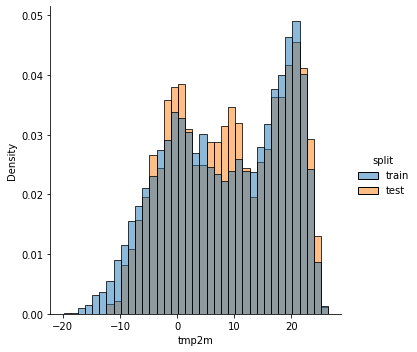

In [57]:
#BY REGION
#choose region
regionchoice = 'North East'
df = merged[merged['Region']==regionchoice]
sns.displot(ax=ax, data=df, x='tmp2m', hue='split', stat='density', common_norm=False)
regtrain = df[df['split']=='train']
regtest = df[df['split']=='test']
print('Train sd: ' + str(round(np.std(regtrain['tmp2m']), 3)) + ' | ' + 'Test sd: ' + str(round(np.std(regtest['tmp2m']), 3)))

/home/pranav/.local/lib/python3.8/site-packages/seaborn/distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


Train sd: 10.033 | Test sd: 10.439


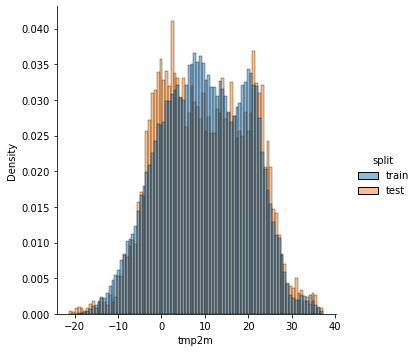

In [72]:
#BY SUBREGION
#'West South Central', 'South Atlantic', 'East South Central', 'Pacific', 'Mountain', 'West North Central', 'East North Central', 'Mid Atlantic', 'New England'

#choose subregion
subregionchoice = 'Mountain'
df = merged[merged['Sub-Region']==subregionchoice]
sns.displot(ax=ax, data=df, x='tmp2m', hue='split', stat='density', common_norm=False)
regtrain = df[df['split']=='train']
regtest = df[df['split']=='test']
print('Train sd: ' + str(round(np.std(regtrain['tmp2m']), 3)) + ' | ' + 'Test sd: ' + str(round(np.std(regtest['tmp2m']), 3)))

/home/pranav/.local/lib/python3.8/site-packages/seaborn/distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


Train sd: 4.547 | Test sd: 4.44


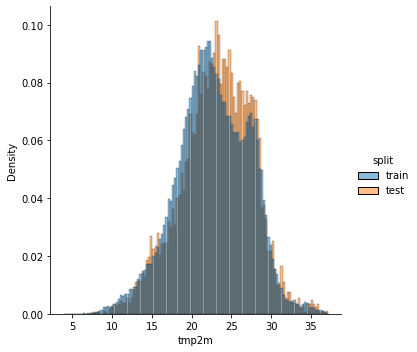

In [100]:
#BY SEASON
#['winter', 'fall', 'summer', 'spring']
#choose season
seasonchoice = 'summer'
df = merged[merged['season']==seasonchoice]
sns.displot(ax=ax, data=df, x='tmp2m', hue='split', stat='density', common_norm=False)
regtrain = df[df['split']=='train']
regtest = df[df['split']=='test']
print('Train sd: ' + str(round(np.std(regtrain['tmp2m']), 3)) + ' | ' + 'Test sd: ' + str(round(np.std(regtest['tmp2m']), 3)))

/home/pranav/.local/lib/python3.8/site-packages/seaborn/distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


Train sd: 7.588 | Test sd: 6.364


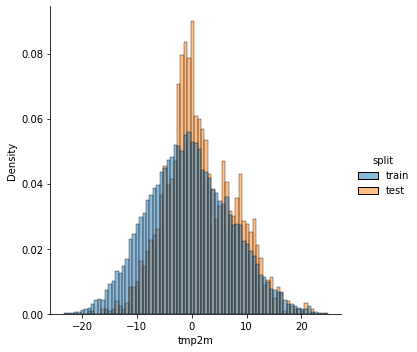

In [96]:
#BY MONTH
#'12', '11', '10', '09', '08', '07', '06', '05', '04', '03', '02', '01']
#choose month
monthchoice = '12'
df = merged[merged['month2']==monthchoice]
sns.displot(ax=ax, data=df, x='tmp2m', hue='split', stat='density', common_norm=False)
regtrain = df[df['split']=='train']
regtest = df[df['split']=='test']
print('Train sd: ' + str(round(np.std(regtrain['tmp2m']), 3)) + ' | ' + 'Test sd: ' + str(round(np.std(regtest['tmp2m']), 3)))
